# What is RFM technique ?
___
<i> RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.<i>

<center><img alt="High Value Customer“ ..what is it? | by Ryan Seitz | Medium" class="n3VNCb" src="https://miro.medium.com/max/638/0*JddVeZpHXdElEec_" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 800px; height: 400px; margin: 2.73307px 0px;">

# How the K-means algorithm works ?
---
<i> Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.<i>   
    
<i> To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.</i>
    
<img alt="3d scatter plot for MS Excel" class="n3VNCb" src="https://www.doka.ch/3dscatterplotrotateanim.gif" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 378px; height: 378px; margin: 0px;">

---
### Data Set Information : Online Retail Data set
<i> This is a transnational data set which contains all the transactions occurring between 01/12/20210 and 09/12/2011 for a UK-based and registered non-store online retail.  
    Data can be downloaded from kaggle <a href = https://www.kaggle.com/vijayuv/onlineretail> Online Retail Data Set - Kaggle </a>, and also available on <a href = https://archive.ics.uci.edu/ml/datasets/online+retail > UCI Machine Learning Repository.<a/></i>   

### Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides


---
## To segment the customers will calculate :
* [RFM Scores for each customers](#RFM)<br>
* [Create clusters using K-means](#K_Means)<b>

# Libraries :

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss

In [ ]:
# install the Kaggle API client
! pip install -q kaggle

In [ ]:
# Unggah file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiaralailatulnikmah","key":"ea8e9eea459681d5180301c97872c620"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mashlyn/online-retail-ii-uci

 69% 10.0M/14.5M [00:00<00:00, 41.1MB/s]
100% 14.5M/14.5M [00:00<00:00, 47.6MB/s]


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os

local_zip = '/content/online-retail-ii-uci.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Data reading and printing head of the data
data = pd.read_csv("/tmp/online_retail_II.csv")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data.shape

(1067371, 8)

In [ ]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data['year'] =pd.DatetimeIndex(data['InvoiceDate']).year
data['month'] =pd.DatetimeIndex(data['InvoiceDate']).month
data['day'] =pd.DatetimeIndex(data['InvoiceDate']).day
data['time'] =pd.DatetimeIndex(data['InvoiceDate']).time
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month,day,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,07:45:00


In [ ]:
data.year.value_counts().head()

2010    522714
2011    499429
2009     45228
Name: year, dtype: int64

In [ ]:
data1 = data[data['year'] == 2011]

In [ ]:
data1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month,day,time
567942,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,10:00:00
567943,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10:00:00
567944,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10:00:00
567945,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10:00:00
567946,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,10:00:00


In [ ]:
# Data reading and printing head of the data
data = pd.read_excel("/content/DataPenjualan.xlsx")
data.head()

,No. Pesanan,Username (Pembeli),Waktu Pesanan Dibuat,Harga Asli Produk,Total Penghasilan
0,220417S3EEBY84,.tiaraa_,2022-04-17,235700,217316
1,220227J2KM8DEN,_13119scorpio,2022-02-27,169900,156648
2,220314U10JX3QD,_kikynl,2022-03-14,169900,156648
3,220415MXBBX837,_lailatun_nasikhah_,2022-04-15,169900,156648
4,220319AMFSJA4T,_shofinr15,2022-03-19,179900,165868


In [ ]:
#Checking the shape of the data set
data.shape

(1683, 5)

In [ ]:
#checking the basic information/details of the data
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   No. Pesanan           1683 non-null   object
 1   Username (Pembeli)    1683 non-null   object
 2   Waktu Pesanan Dibuat  1683 non-null   object
 3   Harga Asli Produk     1683 non-null   int64 
 4   Total Penghasilan     1683 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 65.9+ KB


(None,        Harga Asli Produk  Total Penghasilan
 count        1683.000000        1683.000000
 mean       182094.204991      165932.497920
 std         57791.865458       54453.288214
 min         49900.000000       22100.000000
 25%        169900.000000      148815.000000
 50%        169900.000000      156648.000000
 75%        179900.000000      165868.000000
 max        919200.000000      854856.000000)

In [ ]:
data.isnull().sum()

No. Pesanan             0
Username (Pembeli)      0
Waktu Pesanan Dibuat    0
Harga Asli Produk       0
Total Penghasilan       0
dtype: int64

<i> So we can see that mostly customers are from the UK. So we will keep the data for the United Kingdom only and will filter out all others country data.

In [ ]:
#checking for null values
data.isna().sum()

No. Pesanan             0
Username (Pembeli)      0
Waktu Pesanan Dibuat    0
Harga Asli Produk       0
Total Penghasilan       0
dtype: int64

<i> <b>Till Here we have done the data cleaning and preprocessing parts. And data is good to use.

<a id = "RFM"><a/><b>
# RFM Modeling Technique :
---
<i> <b> Here we will calculate the Recency, Frequency and Monetary for the customers and those are defined as ;   
* Recency : How much time has elapsed since a customer's last activity or transaction with the brand?   
* Frequency : How often has a customer transacted or interacted with the brand during a particular period of time?  
* Monetary : How much a customer has spent with the brand during a particular period of time?

In [ ]:
# For recency will check what was the last date of transaction
#First will convert the InvoiceDate as date variable
data['Waktu Pesanan Dibuat']=pd.to_datetime(data['Waktu Pesanan Dibuat'])
data['Waktu Pesanan Dibuat'].max()

Timestamp('2022-04-29 00:00:00')

<i> so the last date was 2011-12-09 for transaction. So will take latest date for benchmark as 2011-12-10, for the calculation of the Recency.

In [ ]:
data['Waktu Pesanan Dibuat'].min()

Timestamp('2021-12-17 00:00:00')

In [ ]:
#RFM factors calculation:
Latest_date = dt.datetime(2022,4,30)
RFM_data = data.groupby('Username (Pembeli)').agg({ 'Waktu Pesanan Dibuat' : lambda x :(Latest_date - x.max()).days,
                                          'No. Pesanan' : 'count','Total Penghasilan' : 'sum'}).reset_index()

#converting the names of the columns
RFM_data.rename(columns = {'Waktu Pesanan Dibuat' : "Recency",
                          'No. Pesanan' : "Frequency",
                          'Total Penghasilan' : "Monetary"},inplace = True)
RFM_data.head()

,Username (Pembeli),Recency,Frequency,Monetary
0,.tiaraa_,13,1,217316
1,012ratnawati,37,1,165868
2,061103sava,22,1,165868
3,09xx366bl_,12,1,155817
4,0f25q52619,103,1,158007


In [ ]:
# RFM_data Description/ Summary
RFM_data.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,1632.000000,1632.000000,1.632000e+03
mean,43.375613,1.031250,1.711179e+05
std,35.657035,0.270574,8.611650e+04
min,1.000000,1.000000,2.210000e+04
25%,12.000000,1.000000,1.488150e+05
50%,31.000000,1.000000,1.566480e+05
75%,72.250000,1.000000,1.658680e+05
max,134.000000,9.000000,1.912327e+06


# Visualisasi Data EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

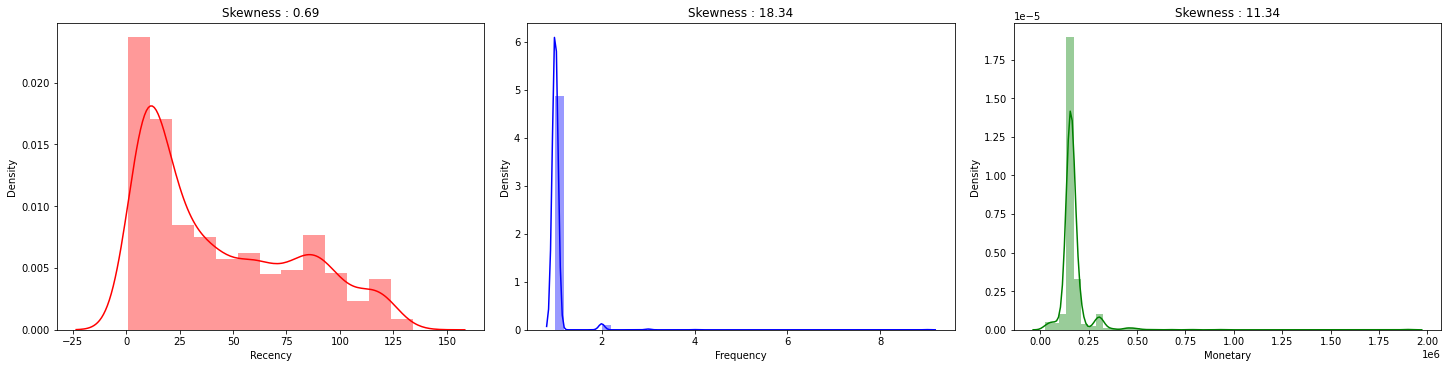

In [ ]:
#Visualizing the Recency, Frequency and Monetary distributions.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1

In [ ]:
#Segmentation :
#Di sini, kita akan membagi kumpulan data menjadi 4 bagian berdasarkan kuantil.
quantiles = RFM_data.drop('Username (Pembeli)',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 148815.0, 0.5: 156648.0, 0.75: 165868.0},
 'Recency': {0.25: 12.0, 0.5: 31.0, 0.75: 72.25}}

In [ ]:
# Membuat fungsi penilaian/segmen R, F dan M
#[1] Recency scoring (Negative Impact : Higher the value, less valuable)
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

#Scoring:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,Username (Pembeli),Recency,Frequency,Monetary,R_score,F_score,M_score
0,.tiaraa_,13,1,217316,2,4,1
1,012ratnawati,37,1,165868,3,4,2
2,061103sava,22,1,165868,2,4,2
3,09xx366bl_,12,1,155817,1,4,3
4,0f25q52619,103,1,158007,4,4,2


In [ ]:
#Sekarang kita akan membuat : RFMGroup dan RFMScore
RFM_data['RFM_Group'] = RFM_data['R_score'].astype(str) + RFM_data['F_score'].astype(str) + RFM_data['M_score'].astype(str)

#Score
RFM_data['RFM_Score'] = RFM_data[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data.head()

,Username (Pembeli),Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,.tiaraa_,13,1,217316,2,4,1,241,7
1,012ratnawati,37,1,165868,3,4,2,342,9
2,061103sava,22,1,165868,2,4,2,242,8
3,09xx366bl_,12,1,155817,1,4,3,143,8
4,0f25q52619,103,1,158007,4,4,2,442,10


<i> Skor RFM telah dihitung sekarang kami akan menggunakan skor ini untuk membuat segmen pelanggan dan menentukan tingkat loyalitas.

In [ ]:
#Membuat segmen Pelanggan/Loyality_level
loyalty_level = ['True Lover','Flirting','Potential lover','Platonic Friend']
cuts = pd.qcut(RFM_data['RFM_Score'],q = 4,labels=loyalty_level)
RFM_data['RFM_Loyality_level'] = cuts.values
RFM_data.tail(15)

,Username (Pembeli),Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
1617,zakiyatulwahidah2019,19,1,170478,2,4,1,241,7,True Lover
1618,zalina102019,6,1,156648,1,4,3,143,8,True Lover
1619,zasqiaf,10,1,140983,1,4,4,144,9,Flirting
1620,zattyzahara07,34,1,184308,3,4,1,341,8,True Lover
1621,zellazakiyah14,9,1,156648,1,4,3,143,8,True Lover
1622,zhafiranabila25,17,1,170478,2,4,1,241,7,True Lover
1623,zhrtsyita,13,1,165868,2,4,2,242,8,True Lover
1624,ziahimroatussolehah,6,1,184308,1,4,1,141,6,True Lover
1625,zilla1912,26,1,148815,2,4,4,244,10,Potential lover
1626,ziyyahfau,88,1,158007,4,4,2,442,10,Potential lover


<i><b> Kami telah mengklasifikasikan pelanggan kami menjadi empat segmen berdasarkan skor R, F dan M mereka.

In [ ]:
RFM_data.to_csv('data_rfm5.csv')

### Visualization for Recency, Frequency and Monetory : RFM_Loyality_level

In [ ]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Monetary V/s Recency
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()

<a id = "K_Means"><a/><b>
# K-Means Clustering Technique :
---
Untuk membuat segmentasi pelanggan berdasarkan K-Means Clustering berdasarkan Skor R, F, dan M:
Sebelum itu kami akan membawa mereka ke dalam skala yang sama dan menormalkannya.

In [ ]:
# First will focus on the negativ and zero before the transformation.
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,1632.000000,1632.000000,1.632000e+03,1632.000000,1632.000000,1632.000000,1632.000000
mean,43.375613,1.031250,1.711179e+05,2.482230,3.930147,2.537990,8.950368
std,35.657035,0.270574,8.611650e+04,1.130776,0.452554,1.115535,1.786416
min,1.000000,1.000000,2.210000e+04,1.000000,1.000000,1.000000,3.000000
25%,12.000000,1.000000,1.488150e+05,1.000000,4.000000,2.000000,8.000000
50%,31.000000,1.000000,1.566480e+05,2.000000,4.000000,3.000000,9.000000
75%,72.250000,1.000000,1.658680e+05,3.250000,4.000000,4.000000,10.000000
max,134.000000,9.000000,1.912327e+06,4.000000,4.000000,4.000000,12.000000


<i> Dari atas kita dapat melihat bahwa kecuali Frequency , Monetary dan Recency memiliki nilai 0. akan tetap menjaganya.

In [ ]:
#Applying on the data.
RFM_data['Recency'] = RFM_data['Recency'].apply(lambda x : right_treat(x))
RFM_data['Monetary'] = RFM_data['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data['Monetary'].skew().astype(str))

Recency Skewness : 0.6938117738802466
Frequency Skewness : 18.33840282710537
Monetary Skewness : 11.336997976946217


<i> Semua variabel benar miring, jadi akan membuat transformasi log itu.

In [ ]:
#Log Transformation
log_RFM_data = RFM_data[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



,Recency,Frequency,Monetary
count,1632.000000,1632.000000,1632.000000
mean,3.334542,0.018479,11.990227
std,1.018189,0.127207,0.333754
min,0.000000,0.000000,10.003300
25%,2.484900,0.000000,11.910500
50%,3.434000,0.000000,11.961800
75%,4.280150,0.000000,12.018900
max,4.897800,2.197200,14.463800


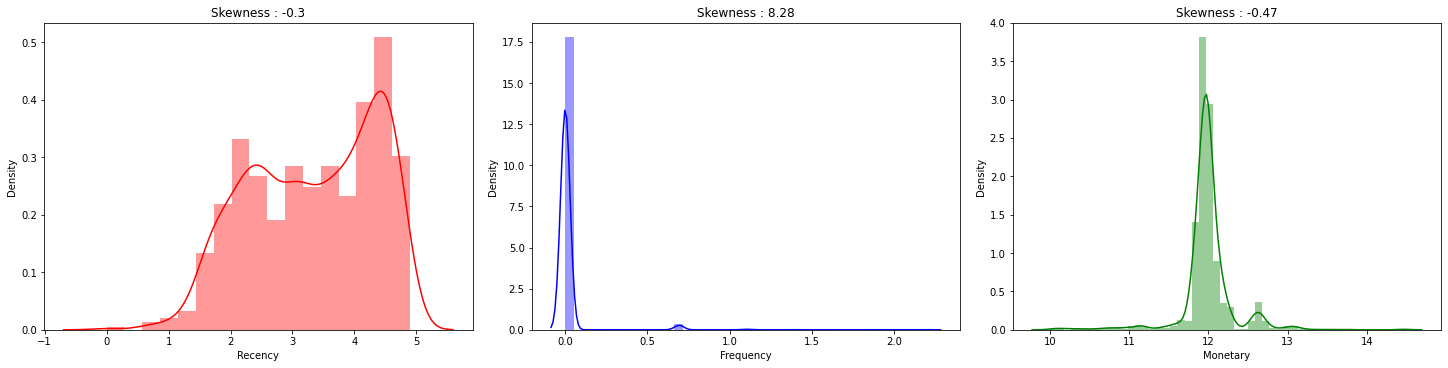

In [ ]:
#Plot after transformation for the distributions :
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)

col = ['red','blue','green']
for var in list(log_RFM_data.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(log_RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(log_RFM_data[var].skew(),2).astype(str))
    i= i+1
log_RFM_data.describe()

<i> Oleh karena itu semua variabel sekarang kira-kira terdistribusi normal. Akan membuat semuanya dalam skala yang sama dengan Nilai Moneter yang sedikit besar.

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Scaled_RFM_data = ss.fit_transform(log_RFM_data)
Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_RFM_data.columns,index=log_RFM_data.index)

In [ ]:
Scaled_RFM_data

,Recency,Frequency,Monetary
0,-0.756124,-0.145308,0.895761
1,0.271505,-0.145308,0.085936
2,-0.239264,-0.145308,0.085936
3,-0.834719,-0.145308,-0.101385
4,1.277324,-0.145308,-0.059425
...,...,...,...
1627,-0.683228,-0.145308,-0.085201
1628,-0.920191,-0.145308,0.085936
1629,-1.694843,-0.145308,-0.572534
1630,0.713110,-0.145308,-0.710702


In [ ]:
Scaled_RFM_data.to_csv('data_rfm6.csv')

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

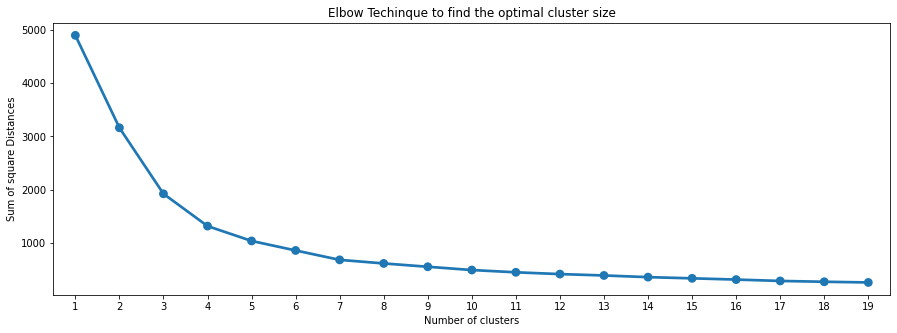

In [ ]:
# Will search the optimal number of cluster based on the Elbow Method as below:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(Scaled_RFM_data)
    SS_distance[k] = mod.inertia_ # metode elbow

#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

<i> Kita dapat mengamati bahwa dengan bertambahnya jumlah cluster, jumlah jarak kuadrat menjadi lebih kecil. Dan akan menghitung cluster tempat siku ini ditekuk. Dalam kasus kami, jumlah jarak kuadrat berkurang secara dramatis pada K = 3, jadi ini adalah nilai optimal untuk dipilih tanpa cluster.

In [ ]:
# Now we will perform K- means clustering on the data set.
KM_clust = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
KM_clust.fit(Scaled_RFM_data)

# Mapping on the data
RFM_data['Cluster'] = KM_clust.labels_
RFM_data['Cluster'] =  RFM_data['Cluster']
RFM_data.head()

,Username (Pembeli),Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
0,.tiaraa_,13,1,217316,2,4,1,241,7,True Lover,0
1,012ratnawati,37,1,165868,3,4,2,342,9,Flirting,2
2,061103sava,22,1,165868,2,4,2,242,8,True Lover,0
3,09xx366bl_,12,1,155817,1,4,3,143,8,True Lover,0
4,0f25q52619,103,1,158007,4,4,2,442,10,Potential lover,2


In [ ]:
RFM_data.to_excel('data_rfm7.xlsx')

In [ ]:
#Membuat segmen Pelanggan/Loyality_level
loyalty_level = ['True Lover','Flirting', 'Potential Lovers', 'Platonic Friends']
cuts = pd.qcut(RFM_data['Cluster'],q = 3,labels=loyalty_level, duplicates='drop')
RFM_data['RFM_Loyality_level'] = cuts.values
RFM_data.tail(15)

ValueError: ignored

In [ ]:
RFM_data2 = RFM_data.drop(columns =['RFM_Group', 'RFM_Score', 'RFM_Loyality_level'])
RFM_data2

,Username (Pembeli),Recency,Frequency,Monetary,R_score,F_score,M_score,Cluster
0,.tiaraa_,13,1,217316,2,4,1,Cluster1
1,012ratnawati,37,1,165868,3,4,2,Cluster0
2,061103sava,22,1,165868,2,4,2,Cluster1
3,09xx366bl_,12,1,155817,1,4,3,Cluster1
4,0f25q52619,103,1,158007,4,4,2,Cluster0
...,...,...,...,...,...,...,...,...
1627,znusaidah,14,1,156648,2,4,3,Cluster1
1628,zsalsabilafirdaus99,11,1,165868,1,4,2,Cluster1
1629,zulfiana666,5,1,133151,1,4,4,Cluster1
1630,zxnofdzrts,58,1,127151,3,4,4,Cluster0


In [ ]:
RFM_data.to_excel('data_rfm4.excel)

SyntaxError: ignored

> <i> Cluster telah dibuat berdasarkan nilai kebaruan, frekuensi dan moneter dengan bantuan K-Means Clustering.

### Visualization for Recency, Frequency and Monetory : Cluster Groups

In [ ]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = 'Recency',y = 'Frequency', color = 'Cluster')
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Frequency', color = 'Cluster')
fig.show()

# Recency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Recency', color = 'Cluster')
fig.show()
